In [1]:
import tensorflow.contrib.eager as tfe
tfe.enable_eager_execution()
import tensorflow as tf
from IPython.display import Image

# READ DATASET - PROPERLY DECODED


In [10]:
filenames_train = "/Users/roxanefischer/Documents/cours/3A/Stage_ML/single-path-nas/other/tiny_imagenet/train-00000-of-01024"
filenames_val = "/Users/roxanefischer/Documents/cours/3A/Stage_ML/single-path-nas/other/tiny_imagenet/validation-00000-of-00128"
raw_dataset_train = tf.data.TFRecordDataset(filenames_train)
raw_dataset_val = tf.data.TFRecordDataset(filenames_val)

cifar = "/Users/roxanefischer/Desktop/cifar/validation-00000-of-00128"
cif  = tf.data.TFRecordDataset(cifar)


In [11]:

raw_image_dataset=raw_dataset 

In [12]:

for raw_record in raw_dataset_val.take(1):
  example = tf.train.Example()
  example.ParseFromString(raw_record.numpy())
  print(example)
  #print(example)


features {
  feature {
    key: "image/channels"
    value {
      int64_list {
        value: 3
      }
    }
  }
  feature {
    key: "image/class/label"
    value {
      int64_list {
        value: 108
      }
    }
  }
  feature {
    key: "image/class/synset"
    value {
      bytes_list {
        value: "n03444034"
      }
    }
  }
  feature {
    key: "image/colorspace"
    value {
      bytes_list {
        value: "RGB"
      }
    }
  }
  feature {
    key: "image/encoded"
    value {
      bytes_list {
        value: "\377\330\377\340\000\020JFIF\000\001\001\000\000\001\000\001\000\000\377\333\000C\000\010\006\006\007\006\005\010\007\007\007\t\t\010\n\014\024\r\014\013\013\014\031\022\023\017\024\035\032\037\036\035\032\034\034 $.\' \",#\034\034(7),01444\037\'9=82<.342\377\333\000C\001\t\t\t\014\013\014\030\r\r\0302!\034!22222222222222222222222222222222222222222222222222\377\300\000\021\010\000@\000@\003\001\"\000\002\021\001\003\021\001\377\304\000\037\000\000\001\005\001\

In [13]:

for raw_record in raw_dataset_train.take(1):
  d=d+1
  example = tf.train.Example()
  example.ParseFromString(raw_record.numpy())
  print(example)


features {
  feature {
    key: "image/channels"
    value {
      int64_list {
        value: 3
      }
    }
  }
  feature {
    key: "image/class/label"
    value {
      int64_list {
        value: 112
      }
    }
  }
  feature {
    key: "image/class/synset"
    value {
      bytes_list {
        value: "n03599486"
      }
    }
  }
  feature {
    key: "image/colorspace"
    value {
      bytes_list {
        value: "RGB"
      }
    }
  }
  feature {
    key: "image/encoded"
    value {
      bytes_list {
        value: "\377\330\377\340\000\020JFIF\000\001\001\000\000\001\000\001\000\000\377\333\000C\000\010\006\006\007\006\005\010\007\007\007\t\t\010\n\014\024\r\014\013\013\014\031\022\023\017\024\035\032\037\036\035\032\034\034 $.\' \",#\034\034(7),01444\037\'9=82<.342\377\333\000C\001\t\t\t\014\013\014\030\r\r\0302!\034!22222222222222222222222222222222222222222222222222\377\300\000\021\010\000@\000@\003\001\"\000\002\021\001\003\021\001\377\304\000\037\000\000\001\005\001\

In [7]:
# Create a dictionary describing the features.
image_feature_description = {
    'image/height': tf.io.FixedLenFeature([], tf.int64),
    'image/width': tf.io.FixedLenFeature([], tf.int64),
    #'image/channels': tf.io.FixedLenFeature([], tf.int64),
    'image/encoded': tf.io.FixedLenFeature([], tf.string),
}

def _parse_image_function(example_proto):
  # Parse the input tf.Example proto using the dictionary above.
  return tf.io.parse_single_example(example_proto, image_feature_description)

parsed_image_dataset = raw_image_dataset.map(_parse_image_function)
parsed_image_dataset


<MapDataset shapes: {image/encoded: (), image/height: (), image/width: ()}, types: {image/encoded: tf.string, image/height: tf.int64, image/width: tf.int64}>

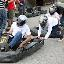

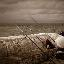

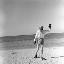

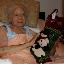

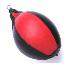

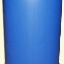

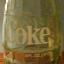

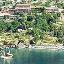

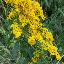

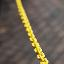

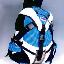

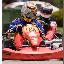

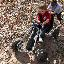

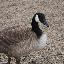

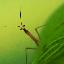

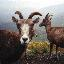

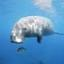

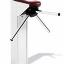

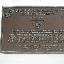

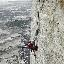

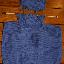

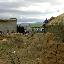

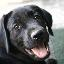

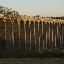

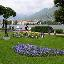

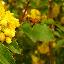

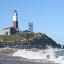

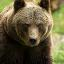

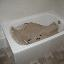

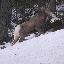

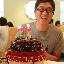

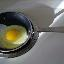

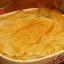

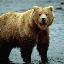

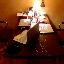

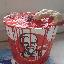

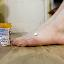

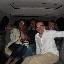

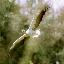

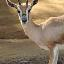

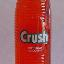

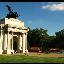

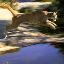

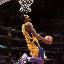

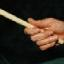

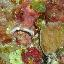

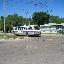

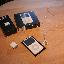

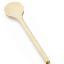

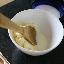

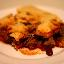

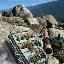

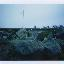

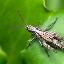

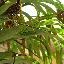

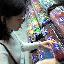

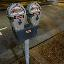

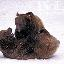

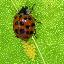

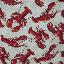

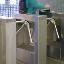

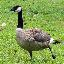

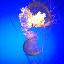

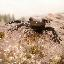

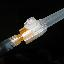

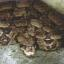

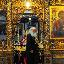

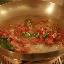

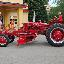

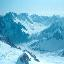

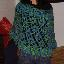

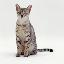

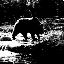

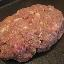

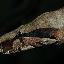

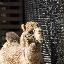

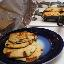

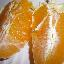

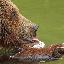

In [8]:

for image_features in parsed_image_dataset:
  image_raw = image_features['image/encoded'].numpy()
  display(Image(data=image_raw))


## Test Imagenet Input

In [19]:
filename = "/Users/roxanefischer/Documents/cours/3A/Stage_ML/single-path-nas/tiny-imagenet-200/test/images/test_0.JPEG"
data_dir = "/Users/roxanefischer/Documents/cours/3A/Stage_ML/single-path-nas/imagenet_3"
is_training = True